In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from keras.datasets import fashion_mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 10s 2us/step


Text(0.5, 0, 'Dress')

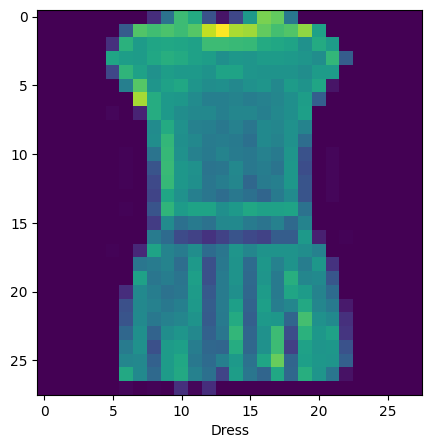

In [3]:
plt.figure(figsize=(15, 5))
plt.imshow(train_images[3])
plt.xlabel(classes[train_labels[3]])

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
ann_model = Sequential()
ann_model.add(Dense(300, activation='relu', input_shape=(28*28,)))
ann_model.add(Dense(340, activation='relu'))
ann_model.add(Dense(10, activation='softmax'))
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [8]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [9]:
ann_model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 27s 11ms/step - loss: 0.4727 - accuracy: 0.8289
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3568 - accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3228 - accuracy: 0.8802
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2984 - accuracy: 0.8892
Epoch 5/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2814 - accuracy: 0.8947
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2674 - accuracy: 0.9003
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2511 - accuracy: 0.9054
Epoch 8/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2420 - accuracy: 0.9066
Epoch 9/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2290 - accuracy: 0.9124
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step -

In [10]:
ann_loss, ann_accuracy = ann_model.evaluate(test_images, test_labels_cat)

313/313 [==============================] - 5s 12ms/step - loss: 0.3411 - accuracy: 0.8846


In [11]:
y_pred = ann_model.predict(test_images)
pred_classes = [np.argmax(element) for element in y_pred]
classes[test_labels[2]]


313/313 [==============================] - 4s 12ms/step


'Trouser'

In [12]:
classes[pred_classes[2]]

'Trouser'

In [13]:
cnn_model = Sequential([
    Conv2D(32, 3, input_shape=(28, 28, 1)),
    MaxPooling2D(2),
    Flatten(),
    Dense(10, activation='softmax'),
])

In [14]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
train_images = train_images / 255
test_images = test_images / 255

train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [17]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [18]:
cnn_model.fit(train_images, train_labels_cat, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 37s 17ms/step - loss: 0.4626 - accuracy: 0.8381
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.3450 - accuracy: 0.8793
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.3084 - accuracy: 0.8920
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2833 - accuracy: 0.8998
Epoch 5/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2666 - accuracy: 0.9063
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2507 - accuracy: 0.9117
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2389 - accuracy: 0.9158
Epoch 8/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2278 - accuracy: 0.9191
Epoch 9/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.2185 - accuracy: 0.9230
Epoch 10/10
1875/1875 [==============================] - 27s 14m

In [19]:
cnn_model.evaluate(test_images, test_labels_cat)

313/313 [==============================] - 5s 14ms/step - loss: 0.2997 - accuracy: 0.8966


[0.2996806204319, 0.8966000080108643]

In [20]:
y_pred = cnn_model.predict(test_images)
pred_classes = [np.argmax(element) for element in y_pred]
classes[pred_classes[0]]


313/313 [==============================] - 4s 13ms/step


'Ankle boot'

In [21]:
classes[test_labels[0]]

'Ankle boot'